# Bank transactions

To get started let's import some libraries and take a look at our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

df = pd.read_csv('transactions_dataset.csv')
print(df.shape)
df.head()

(30219, 7)


,transaction_id,account_timestamp,amt,fee,transaction_details,transaction_timestamp,account_no
0,0,2021-06-25 21:47:48,701.40,14.9589,TYPE_1,2021-07-23 20:12:46,1
1,1,2021-04-09 02:42:41,1870.40,14.9589,TYPE_1,2021-08-20 14:37:06,2
2,4,2021-04-12 23:57:14,70140.00,11.9369,TYPE_1,2021-08-13 19:01:56,3
3,5,2021-02-26 23:15:56,2338.00,14.9589,TYPE_1,2021-07-01 14:25:54,4
4,9,2021-06-02 18:02:26,2256.17,14.9589,TYPE_1,2021-06-04 17:37:23,5


The dataset we'll be exploring is a small fintech startup transactions dataset where each line is a transaction made by a user.

Let's start answering the questions.

## Q3. The company is facing some database maintanence challenges that causes a need to take down the server for a couple hours. When would be the least caotic day of the week and time to do that?

Let's take a look at how the transactions are spread over the week days.

In [2]:
# transform transaction_timestamp column into datetime format
df.transaction_timestamp = pd.to_datetime(df.transaction_timestamp)

In [3]:
# create a weekday column
weekday_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['week_day'] = df['transaction_timestamp'].dt.dayofweek.map(weekday_dict)

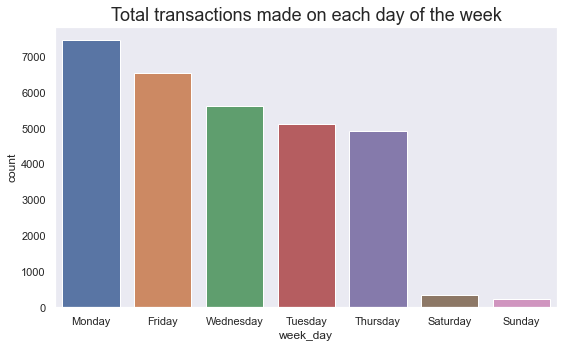

In [4]:
# number of transactions on each weekday over the last year
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=df.week_day, ax=ax, order=df.week_day.value_counts().index)
ax.set_title('Total transactions made on each day of the week', fontsize=18)
plt.tight_layout()

The number of transactions made on the weekends (Sat and Sun) are much lower than during the week.

Now let's take a look at the time of the day.

In [5]:
t = df.groupby(df.transaction_timestamp.dt.hour)['transaction_id'].count().reset_index()
t = t.rename(columns={'transaction_timestamp': 'hour_of_day', 'transaction_id': 'count'})
t.sort_values('count', ascending=True)[:5]

,hour_of_day,count
9,9,2
8,8,4
7,7,16
4,4,42
6,6,46


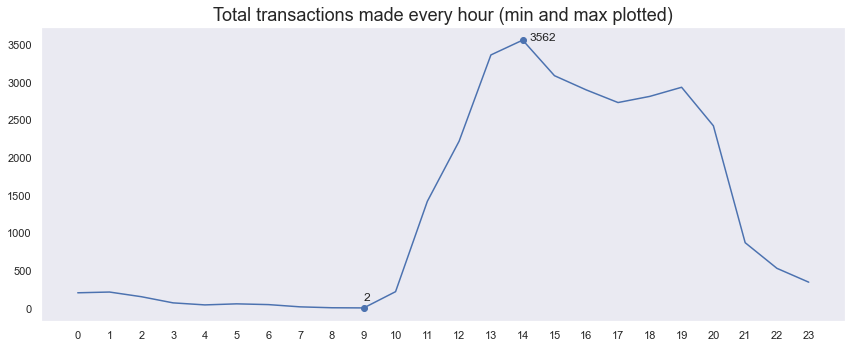

In [6]:
fig, ax = plt.subplots(figsize=(12,5))

t['count'].plot(ax=ax)
ax.set_title("Total transactions made every hour (min and max plotted)", size=18)

x_min = t[(t['count'] == t['count'].min())].hour_of_day.to_list()[0]
y_min = t['count'].min()

x_max = t[(t['count'] == t['count'].max())].hour_of_day.to_list()[0]
y_max = t['count'].max()

plt.xticks(t.hour_of_day)
plt.plot(x_min, y_min, 'bo')
plt.plot(x_max, y_max, 'bo')
plt.annotate(y_min, (x_min,(y_min+100)))
plt.annotate(y_max, (x_max+.2,(y_max)))

plt.tight_layout()

Overall the busiest times for transactions are from 11am til 8pm and the less busy times are from 10pm til 9am.

Let's take a look at the less busy day's (Sunday) times and determine a time window for the maintanence.

In [7]:
# make a copy of the dataframe only with transactions made on sundays
df_sunday = df.copy()
df_sunday = df_sunday[df_sunday.week_day.astype('str') == 'Sunday']

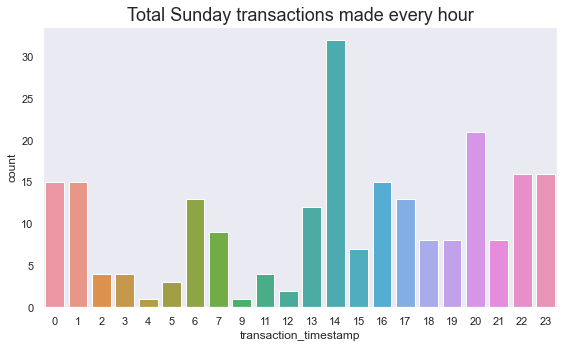

In [8]:
# quantidade de transações realizadas em cada hora dos domingos
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=df_sunday.transaction_timestamp.dt.hour, ax=ax)
ax.set_title("Total Sunday transactions made every hour", fontsize=18)
plt.tight_layout()

The less busy time window on a Sunday is usually from 2am til 5am or from 9am til 12pm.

Those would be ok time windows to perform database maintainence and have as little customer friction as possible.